In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [223]:
SEED = 42
def sample(nsample, signal_func=np.sin):
    # sample
    np.random.seed(SEED)
    x = np.linspace(0, 2 * np.pi, nsample)
    noise = np.random.normal(size=nsample) * 0.5
    y = signal_func(x) + noise
    return x, y

def polynomial_fit(x, y, degree, reg=None):
    X = np.stack([x ** pow for pow in np.arange(degree + 1)], axis=-1)
    mat = X.T @ X
    if reg is not None:
        mat = mat + reg * np.eye(degree + 1)
    print(mat.shape)
    coef = np.linalg.inv(mat) @ X.T @ y
    polynomial = lambda x: [(p ** np.arange(degree + 1)) @ coef.T for p in x]
    return polynomial
    

def plot(x, y, pred_curve_func, signal_func=np.sin):
    # plot sample points
    plt.figure(figsize=(10, 7))
    plt.scatter(x, y, s=100, facecolors="none", edgecolors="b")
    
    x = np.linspace(0, 2 * np.pi, 100)
    # plot signal function curve
    y = signal_func(x)
    plt.plot(x, y, "g")
    
    # plot predicted curve
    y = pred_curve_func(x)
    plt.plot(x, y, "r")
    

## sample the function curve of $y=sin(x)$ with Gaussian noise

(4, 4)


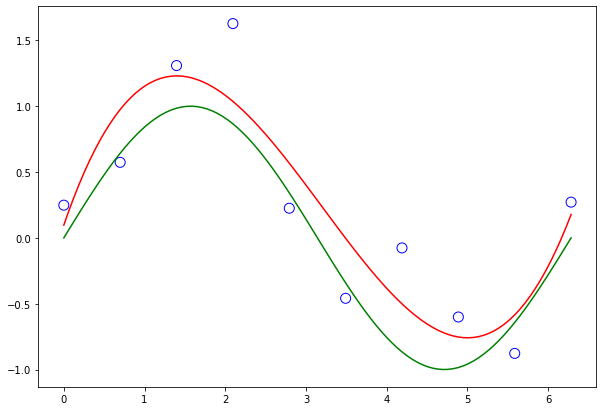

In [224]:
nsample = 10
x, y = sample(nsample)

degree = 3
pred_curve_func = polynomial_fit(x, y, degree)
plot(x, y, pred_curve_func)

## fit degree 3 and 9 curves in 10 samples

(10, 10)


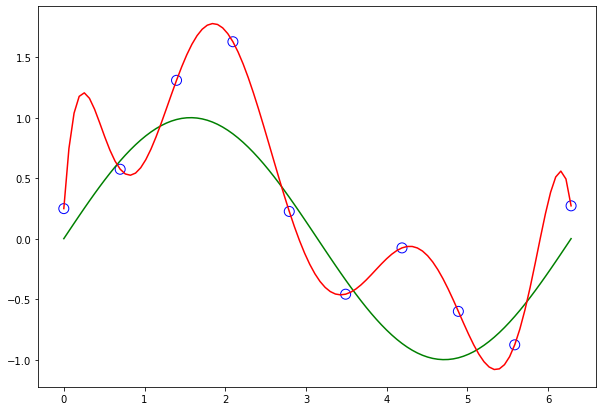

In [225]:
nsample = 10
x, y = sample(nsample)

degree = 9
pred_curve_func = polynomial_fit(x, y, degree)
plot(x, y, pred_curve_func)

## fit degree 9 curves in 15 and 100 samples

(10, 10)


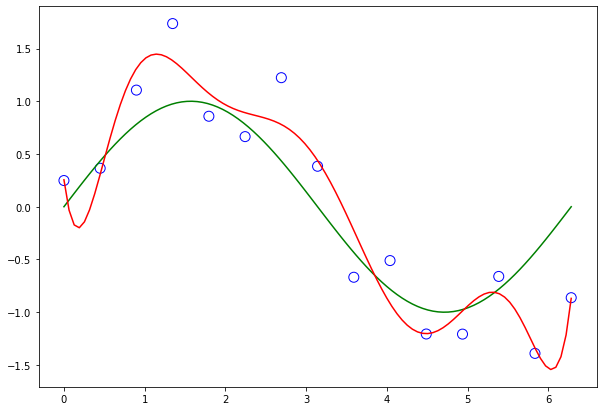

In [226]:
nsample = 15
x, y = sample(nsample)

degree = 9
pred_curve_func = polynomial_fit(x, y, degree)
plot(x, y, pred_curve_func)

(10, 10)


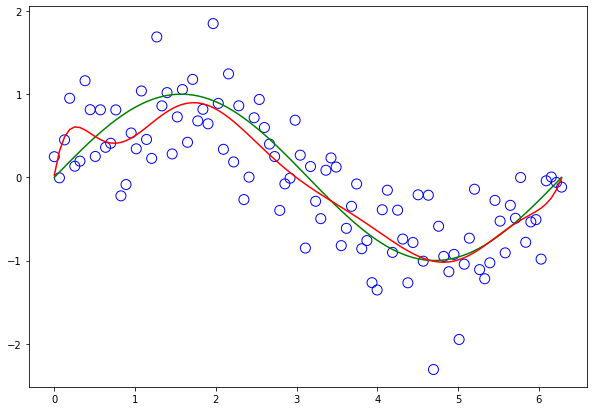

In [227]:
nsample = 100
x, y = sample(nsample)

degree = 9
pred_curve_func = polynomial_fit(x, y, degree)
plot(x, y, pred_curve_func)

## fit degree 9 curves in 10 samples but with regularization term

(10, 10)


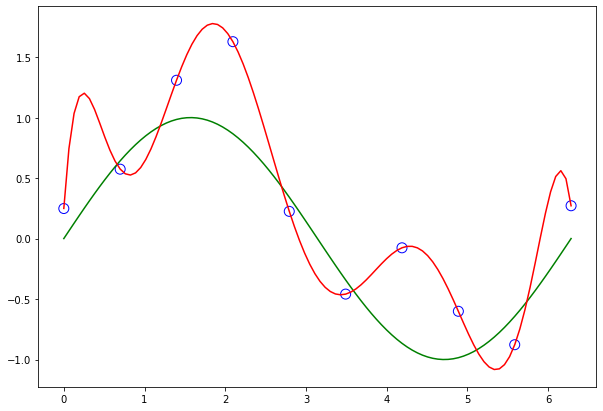

In [228]:
nsample = 10
x, y = sample(nsample)

degree = 9
reg = np.exp(-18)
pred_curve_func = polynomial_fit(x, y, degree, reg)
plot(x, y, pred_curve_func)